Title pending

Introduction:

Attribute Information: 
This dataset contains information about student study habits, exam performance, and overall knowledge level on the subject of electrical DC machines. The dataset was provided by undergraduate studnets at the Department of Electrical Education of Gazi University. Information on overall knowledge level was collected using an intuitive knowledge classifier 

Question: 
What is a person's overall knowledge level of electrical Direct Current (DC) machines based on their duration of study and performance on exams related to the subject?

Dataset:
The User Knowledge Modeling Data Set was used for this project. This project will develop a method for classifying observations with unknown UNS values. UNS is a type of factor variable which classifies level of student understanding of electrical DC machines. Classification predictions will be made based on the STG and PEG columns, which are double floating point variables that contain observations for degree of study time for relevant materials and exam performance for relevant goals respectively. 

In [1]:
#readxl doesn't accept URLs, so I'm using the rio library as a workaround.
library(tidyverse)
install.packages("rio")
library(rio)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
#reading and cleaning up the sheet + transforming UNS into factor data. Feel free to clean this up, since I'm not entirely sure what to do with it
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
knowledge <- import(file = url, sheet = 2, range = "A1:F259") 
knowledge$UNS <- gsub('very_low', 'Very Low', knowledge$UNS)
knowledge <- mutate(knowledge, UNS = as_factor(UNS))
knowledge

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,Very Low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,Very Low
0.20,0.140,0.35,0.72,0.25,Low


In [3]:
#finding total number of each class to check for over/underrepresentation
class_total <- group_by(knowledge, UNS) %>%
summarize(n = n())
class_total

#checking for total missing values in relevant variables
is_na <- select(knowledge, STG, PEG) %>%
summarize(STG_na_total = sum(is.na(STG)), PEG_na_total = sum(is.na(PEG)))
is_na

#are there any other summary statistics that might be relevant for a classification problem?

`summarise()` ungrouping output (override with `.groups` argument)



UNS,n
<fct>,<int>
Very Low,24
High,63
Low,83
Middle,88


STG_na_total,PEG_na_total
<int>,<int>
0,0


Warning message:
“Use of `knowledge$UNS` is discouraged. Use `UNS` instead.”


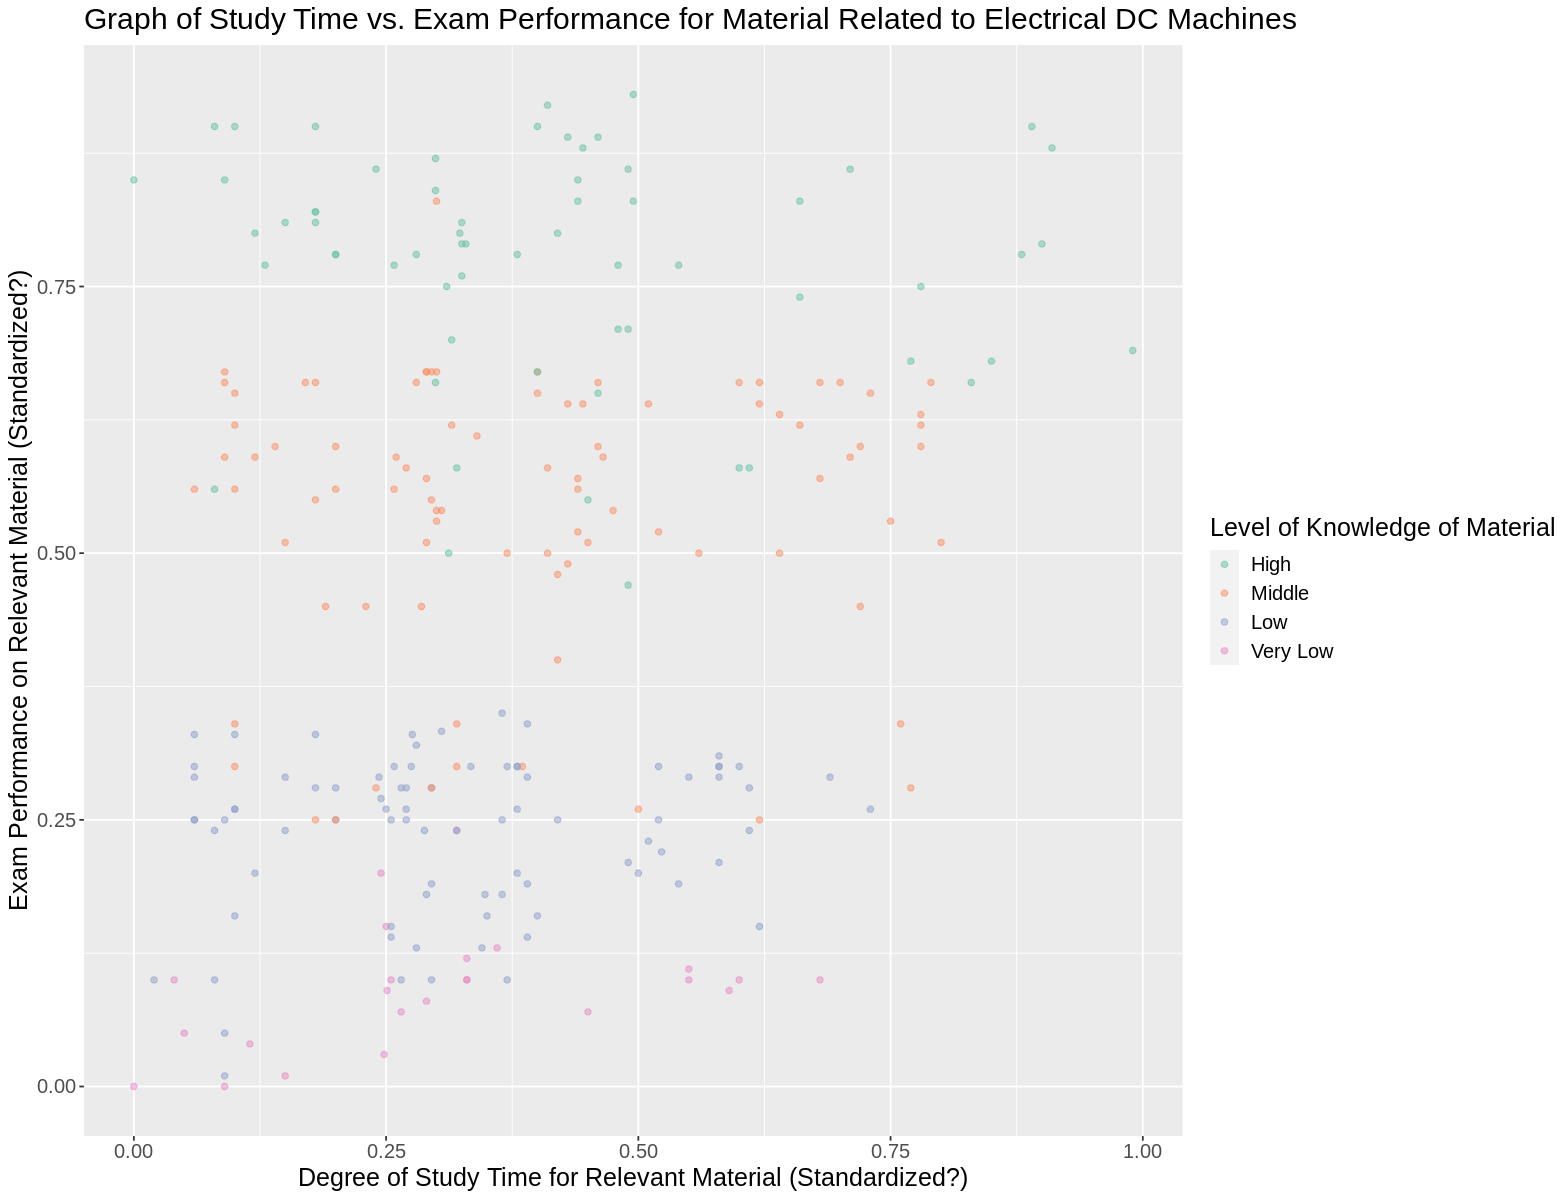

In [4]:
#visualization with relevant predictor variables
#the data seems to have been standardized in some way, but I'm not certain exactly what they did? I don't see any information about this
#on the sheets. if you figure out what it is please lmk
options(repr.plot.width = 13, repr.plot.height = 10) 
knowledge$UNS <- (factor(knowledge$UNS, levels = c('High', 'Middle', 'Low', 'Very Low'))) #the way i rearranged this legend is kind of goofy. feel free to clean it up
knowledge_plot <- ggplot(knowledge, aes(x = STG, y = PEG, color = knowledge$UNS)) +
geom_point(alpha = 0.5) + #there aren't too many overlapping points, but we might want to include an alpha value?
labs(x = 'Degree of Study Time for Relevant Material (Standardized?)', y = 'Exam Performance on Relevant Material (Standardized?)', color = 'Level of Knowledge of Material') +
ggtitle("Graph of Study Time vs. Exam Performance for Material Related to Electrical DC Machines") +
theme(text = element_text(size = 15)) +
scale_color_brewer(palette = 'Set2') #colourblind friendly. feel free to choose an alternate option, though.
knowledge_plot